## FLM call tracking revenue analysis for 1st quarter 2021 
 

In [172]:
import pyodbc 
import jaydebeapi 

In [173]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme

# set_nb_theme('chesterish')

In [174]:
!jt -t chesterish

In [175]:
import jpype
import ibm_db
import ibm_db_dbi
from pandas.io import sql
import pandas.io.sql as psql

In [176]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
import datetime
from datetime import datetime as dt
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
# %matplotlib inline
# sns.set()

In [177]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

## ESA server connection 

In [7]:
# # #To connect to ESA Database which is NetezzaSQL, install odbc driver.
# print (pyodbc.dataSources()) 
# conn = pyodbc.connect('DRIVER={NetezzaSQL};'\
# 'SERVER=pda2-wall.pok.ibm.com;'\
# 'PORT=5480;'\
# 'DATABASE=bacc_prd_eapda_eapda;'\
# 'UID=smsthink;PWD=Q22021ThinkSummerEO!;')

## Importing data from 1st January 2021 to 31st May  2021

In [8]:
# # # query1 = 'select * from EDGEDM.CRM_SELLER_CALL_FACT WHERE DATE_ENTERED BETWEEN 2020-01-01 AND 2020-12-01'
# sql = """ SELECT EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_CURR_WEEK_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_WK_QTRYR_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_SOURCE,
# EDGEDM.CRM_SELLER_CALL_FACT.ACTIVE_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_ENTERED,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_MODIFIED,
# EDGEDM.CRM_SELLER_CALL_FACT.CNUM,
# EDGEDM.CRM_SELLER_CALL_FACT.INTERACTION_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.DIRECTION,
# EDGEDM.CRM_SELLER_CALL_FACT.STATUS,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_START,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_END,
# EDGEDM.CRM_SELLER_CALL_FACT.START_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.END_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CALL_WEEK_MNEMONIC_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.TAGS,
# EDGEDM.CRM_SELLER_CALL_FACT.DURATION,
# EDGEDM.CRM_SELLER_CALL_FACT.IW_ROW_UPDT_TS

# FROM EDGEDM.CRM_SELLER_CALL_FACT
# WHERE EDGEDM.CRM_SELLER_CALL_FACT.DATE_START BETWEEN ? AND ? ;"""

# df1 = pd.read_sql_query(sql, conn, params=['2021-01-01','2021-01-01'])

## Importing data from 1st January 2021 to 31st March 2021

Since the data rannge is requed huge momery , we have to extract it month wise 

In [9]:
# sql = """ SELECT EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_CURR_WEEK_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.SNAPSHOT_WK_QTRYR_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.CRM_SOURCE,
# EDGEDM.CRM_SELLER_CALL_FACT.ACTIVE_INDC,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_ENTERED,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_MODIFIED,
# EDGEDM.CRM_SELLER_CALL_FACT.CNUM,
# EDGEDM.CRM_SELLER_CALL_FACT.INTERACTION_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.DIRECTION,
# EDGEDM.CRM_SELLER_CALL_FACT.STATUS,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_START,
# EDGEDM.CRM_SELLER_CALL_FACT.DATE_END,
# EDGEDM.CRM_SELLER_CALL_FACT.START_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.END_DAY_KEY,
# EDGEDM.CRM_SELLER_CALL_FACT.CALL_WEEK_MNEMONIC_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_TYPE,
# EDGEDM.CRM_SELLER_CALL_FACT.PARENT_ID,
# EDGEDM.CRM_SELLER_CALL_FACT.TAGS,
# EDGEDM.CRM_SELLER_CALL_FACT.DURATION,
# EDGEDM.CRM_SELLER_CALL_FACT.IW_ROW_UPDT_TS

# FROM EDGEDM.CRM_SELLER_CALL_FACT
# WHERE YEAR(EDGEDM.CRM_SELLER_CALL_FACT.DATE_START) = ? AND MONTH(EDGEDM.CRM_SELLER_CALL_FACT.DATE_START) = ?; """


#### Import data from sql serve for May 2021

In [10]:
# df_may = pd.read_sql_query(sql, conn, params=[2021,5])
# # df_may.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_may.csv', index = False, header=True

#### Import data from sql serve for APR 2021

In [11]:
# df_apr = pd.read_sql_query(sql, conn, params=[2021,4])
# # df_apr.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_apr.csv', index = False, header=True)

#### Import data from sql serve for MAR 2021

In [12]:
# df_mar = pd.read_sql_query(sql, conn, params=[2021,3])
# # df_mar.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_mar.csv', index = False, header=True)

#### Import data from sql serve for FEB 2021

In [13]:
# df_feb = pd.read_sql_query(sql, conn, params=[2021,2])
# # df_feb.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_feb.csv', index = False, header=True)

#### Import data from sql serve for JAN 2021

In [14]:
# df_jan = pd.read_sql_query(sql, conn, params=[2021,1])
# df_jan.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/df_jan.csv', index = False, header=True)               

#### Import to one file all JAN to MAR 2021

In [15]:
# df1qtr = df_mar.append([df_feb,df_jan],ignore_index = True)
# df2021 = df_may.append([df_apr,df_mar,df_feb,df_jan],ignore_index = True)

In [16]:
## Store in local drive 
# df1qtr = pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/df1qtr.csv')
# # # df_jan = pd.read_csv('C:/Users/SuprasannaPradhan/Documents/DIA/df_jan.csv')

#### Removeing leading zeros from the data key 

In [17]:
# df1qtr['CNUM'] = df1qtr['CNUM'].apply(lambda x:x.lstrip('0') if type(x) == str else x)

In [18]:
# df1qtr.count()

In [19]:
# df_jan['Numeric_CNUM'] = pd.to_numeric(df_jan['CNUM'], errors='coerce')
# mask = df_jan['Numeric_CNUM'].isna()
# df_jan.loc[mask, 'Text_CNUM'] = df_jan.loc[mask, 'CNUM']
# # df_jan.drop(columns=['CNUM'])

In [20]:
# df_jan['row3'] = df_jan.Numeric_CNUM
# df_jan.loc[df_jan.row3 > 0 , 'row3'] = df_jan.CNUM

In [21]:
# df_jan['row4'] = df_jan['row3'] * 1  

In [22]:
# df_jan['Text_CNUM'].fillna('', inplace=True)
# df_jan['Numeric_CNUM'] = df_jan['Numeric_CNUM'].astype(object).fillna('')

## Importing FMS data 

In [23]:
# fms_data = pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/EDGEDM_DIM_FMS_HIERS.csv')

## Merging data set and saved local drive 

In [24]:
# qtr1_call = pd.merge(left = df1qtr, right=fms_data,how='left', left_on='CNUM', right_on='CNUM',indicator=True)
# qtr1_call.to_csv (r'C:/Users/SuprasannaPradhan/Documents/DIA/qtr1_call.csv', index = False, header=True)

In [25]:
chunksize = 10000
qtr= pd.read_csv ('C:/Users/SuprasannaPradhan/Documents/DIA/qtr1_call.csv',chunksize=chunksize, iterator=True)
qtr1_call = pd.concat(qtr, ignore_index=True)

In [26]:
qtr1_call["EMP_FULL_NAME"] = qtr1_call["EMP_FULL_NAME"].str.upper()

## Overview of data 

In [27]:
qtr1_call.columns

Index(['SNAPSHOT_CURR_WEEK_INDC', 'SNAPSHOT_WK_QTRYR_KEY', 'CRM_ID',
       'CRM_SOURCE', 'ACTIVE_INDC', 'DATE_ENTERED', 'DATE_MODIFIED', 'CNUM',
       'INTERACTION_TYPE', 'DIRECTION', 'STATUS', 'DATE_START', 'DATE_END',
       'START_DAY_KEY', 'END_DAY_KEY', 'CALL_WEEK_MNEMONIC_ID', 'PARENT_TYPE',
       'PARENT_ID', 'TAGS', 'DURATION', 'IW_ROW_UPDT_TS', 'IS_MGR_INDC',
       'GBL_INDC', 'EMP_INTERNET_ID', 'EMP_FULL_NAME', 'ORG_NAME',
       'JOB_ROLE_DESC', 'JOB_ROLE_TYPE', 'ROLE_DESC', 'JOB_ROLE_CTGY2_DESC',
       'JOB_ROLE_CTGY3_DESC', 'JOB_ROLE_GROUP_NAME', 'SELLER_LEVEL_NAME',
       'ORG_ROLLUP2_DESC', 'ORG_ROLLUP1_DESC', 'IOT_ID', 'IOT_NAME', 'IMT_ID',
       'IMT_NAME', 'FMS_LVL', 'FMS_LEVEL_0', 'FMS_LEVEL_1', 'FMS_LEVEL_2',
       'FMS_LEVEL_3', 'FMS_LEVEL_4', 'FMS_LEVEL_5', 'FMS_LEVEL_6',
       'FMS_LEVEL_7', 'FMS_LEVEL_8', 'FMS_LEVEL_9', 'FMS_LEVEL_10',
       'FMS_LEVEL_11', 'FMS_LEVEL_12', 'FMS_LEVEL_13', 'FMS_LEVEL_14',
       'FMS_PRSN_LEVEL_0', 'FMS_PRSN_LEVEL_1', '

It is very huge data we have been having 5.1 + MB

In [28]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# qtr1_call


## Adding Month and Week variable in the data set 

In [29]:
q1_date = qtr1_call.groupby(['CNUM'])['DATE_START'].agg(['first','last']).reset_index()
q1_date.count()

CNUM     9952
first    9952
last     9952
dtype: int64

In [30]:
#Adding month and weeks in the data set 
q1_date_update = q1_date .iloc[ : , [0,1,2]] 
q1_date_update.columns = ['CNUM','DATE_START_f','DATE_START_e',] 
q1_date_update = q1_date_update.drop(columns=['DATE_START_e'])
q1_date_update["DATE_START_f"] = pd.to_datetime(q1_date_update.DATE_START_f, format='%Y-%m-%d %H:%M:%S')
q1_date_update['DATE_START_f'] = pd.to_datetime(q1_date_update.DATE_START_f, format='%Y-%m-%d')
q1_date_update['DATE_START_f'] = q1_date_update['DATE_START_f'].dt.strftime('%Y-%m-%d')
q1_date_update['MONTH'] = pd.PeriodIndex(q1_date_update['DATE_START_f'], freq='M')
q1_date_update['WEEK'] = pd.PeriodIndex(q1_date_update['DATE_START_f'], freq='W')

In [31]:
q1_date_update

,CNUM,DATE_START_f,MONTH,WEEK
0,100010702,2021-03-23,2021-03,2021-03-22/2021-03-28
1,100022866,2021-03-02,2021-03,2021-03-01/2021-03-07
2,10002834,2021-01-12,2021-01,2021-01-11/2021-01-17
3,100049866,2021-03-09,2021-03,2021-03-08/2021-03-14
4,100119866,2021-02-01,2021-02,2021-02-01/2021-02-07
...,...,...,...,...
9947,ZZ096O672,2021-03-08,2021-03,2021-03-08/2021-03-14
9948,ZZ097D672,2021-03-08,2021-03,2021-03-08/2021-03-14
9949,ZZ09CC672,2021-02-02,2021-02,2021-02-01/2021-02-07
9950,ZZ09HX672,2021-03-15,2021-03,2021-03-15/2021-03-21


## Prepared subset of data set 

In [32]:
# Subset of data whihc  variables are need for our analysis 
q1_prune = qtr1_call .iloc[ : , [7,8,9,10,11,12,16,18,19,23,24,25,32,36,38,56,72,82]] 
q1_prune.head()

,CNUM,INTERACTION_TYPE,DIRECTION,STATUS,DATE_START,DATE_END,PARENT_TYPE,TAGS,DURATION,EMP_INTERNET_ID,EMP_FULL_NAME,ORG_NAME,SELLER_LEVEL_NAME,IOT_NAME,IMT_NAME,FMS_PRSN_LEVEL_1,EMPLOYEE_MGR_L1_NAME,LEVERAGE_GROUP
0,1J6736897,Phone,Outbound,Held,2021-03-03 18:30:00,2021-03-03 19:00:00,Opportunities,NaN,30,Linda.Burke1@ibm.com,LINDA BURKE,AI Applications Portfolio,Non-Executive,Americas,US Distr Market,BRIDGET VAN KRALINGEN,Kevin Reese,POOL
1,R41242821,Phone,Outbound,Held,2021-03-10 10:00:00,2021-03-10 11:00:00,Accounts,NaN,0,Gostev.AV@ru.ibm.com,ALEXEY GOSTEV,Data and AI,Employee,EMEA,CEE Mkt,BRIDGET VAN KRALINGEN,Alexander Klimenkov,ABSOLUTE
2,75610655,Phone,Outbound,Held,2021-03-03 16:00:00,2021-03-03 16:30:00,Accounts,NaN,30,cpenailillob@ibm.com,CAMILA IGNACIA PENAILILLO,Data and AI,Employee,Americas,Latin America Mkt,BRIDGET VAN KRALINGEN,Santiago Diego Sibils Ramos,ABSOLUTE
3,101722778,Video,Outbound,Held,2021-03-03 08:00:00,2021-03-03 09:00:00,soc_businesspartners,NaN,0,limyc@my.ibm.com,YEE CHING LIM,Systems HW Server,Non-Executive,APAC,ASEAN Mkt,BRIDGET VAN KRALINGEN,CHOO KWOK GOH,POOL
4,2632U744,Video,Outbound,Held,2021-03-23 05:30:00,2021-03-23 08:00:00,Opportunities,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
q1_prune.count()

CNUM                    8207633
INTERACTION_TYPE        7983541
DIRECTION               8207410
STATUS                  8208565
DATE_START              8208565
DATE_END                8208565
PARENT_TYPE             8155040
TAGS                    2103314
DURATION                8208565
EMP_INTERNET_ID         7260356
EMP_FULL_NAME           7256801
ORG_NAME                7260356
SELLER_LEVEL_NAME       7260356
IOT_NAME                7260356
IMT_NAME                7260356
FMS_PRSN_LEVEL_1        6432358
EMPLOYEE_MGR_L1_NAME    7244105
LEVERAGE_GROUP          7260356
dtype: int64

In [34]:
# Final merged data 
dt_mrg= pd.merge(q1_prune, q1_date_update, on ='CNUM',how='left')

In [35]:
dt_mrg.count()

CNUM                    8207633
INTERACTION_TYPE        7983541
DIRECTION               8207410
STATUS                  8208565
DATE_START              8208565
DATE_END                8208565
PARENT_TYPE             8155040
TAGS                    2103314
DURATION                8208565
EMP_INTERNET_ID         7260356
EMP_FULL_NAME           7256801
ORG_NAME                7260356
SELLER_LEVEL_NAME       7260356
IOT_NAME                7260356
IMT_NAME                7260356
FMS_PRSN_LEVEL_1        6432358
EMPLOYEE_MGR_L1_NAME    7244105
LEVERAGE_GROUP          7260356
DATE_START_f            8207633
MONTH                   8207633
WEEK                    8207633
dtype: int64

## Importing sales revenue data 

In [86]:
flm_rev = pd.read_excel('C:/Users/SuprasannaPradhan/Documents/DIA/PQ_ALL_Seller_Detail_041521.xlsx')
# flm_rev = pd.read_excel('users.xlsx', sheet_name = [0,1,2])

In [87]:
flm_rev.head(2)

,Group,Grp,Geo,Mkt,Serial No,Seller,FLM,Sub Brand,Sales Role,Segment,...,WSR$,WSR +KS$,No ValPipe,No WSR,No WSR +KS,WSR +KS< 5 ops,WSR< $50K,WSR< $100K,WSR< $250K,WSR< $500K
0,Technology,Systems,AMER,US,0J1182897,Ashley Oswald/US/IBM@IBM,Cary Binz/Raleigh/IBM@IBM,Systems HW Server,Brand Sales Partner Specialist (BSPS) Server ...,Segment 2,...,-,-,1,1,1,1,-,-,-,-
1,Technology,Systems,AMER,US,241587897,Joe Broadway/Dallas/IBM@IBM,Chris Winters/Atlanta/IBM@IBM,Systems HW Server,Brand Sales Partner Specialist (BSPS) Power D...,Shared,...,0.058,0.058,-,-,-,1,-,1,1,1


#### Seperating Employee names from the  eamil id 

In [88]:
# Seperating employee name from eemail id 
flm_rev[['EMP_FULL_NAME','COUNTRY_EMP','OTHER_EMP','NONE_EMP']] = flm_rev.Seller.str.split("/",expand=True)
# Seperating FLM  name from  eemail id 
flm_rev[['EMPLOYEE_MGR_L1_NAME ','COUNTRY_MGR','OTHER_MGR']] = flm_rev.FLM.str.split("/",expand=True)

In [89]:
flm_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Group                  4305 non-null   object
 1   Grp                    4305 non-null   object
 2   Geo                    4305 non-null   object
 3   Mkt                    4305 non-null   object
 4   Serial No              4297 non-null   object
 5   Seller                 4305 non-null   object
 6   FLM                    4303 non-null   object
 7   Sub Brand              4305 non-null   object
 8   Sales Role             4305 non-null   object
 9   Segment                4305 non-null   object
 10  Val Pipe$              4305 non-null   object
 11  WSR$                   4305 non-null   object
 12  WSR +KS$               4305 non-null   object
 13  No ValPipe             4305 non-null   object
 14  No WSR                 4305 non-null   object
 15  No WSR +KS           

#### Subset of revenue data 

In [90]:
q1_rev = flm_rev.iloc[ : , [21,10,7,9,22,2,3,25]] 

In [91]:
q1_rev["EMP_FULL_NAME"] = q1_rev["EMP_FULL_NAME"].str.upper()

In [92]:
q1_rev.head()

,EMP_FULL_NAME,Val Pipe$,Sub Brand,Segment,COUNTRY_EMP,Geo,Mkt,EMPLOYEE_MGR_L1_NAME
0,ASHLEY OSWALD,-,Systems HW Server,Segment 2,US,AMER,US,Cary Binz
1,JOE BROADWAY,0.058,Systems HW Server,Shared,Dallas,AMER,US,Chris Winters
2,CAROLINE CASSIDY,-,Systems HW Storage,Segment 2,Atlanta,AMER,US,Chris Winters
3,PAULA BOSLEY,-,Systems HW Storage,Segment 1,Wayne,AMER,US,Chris Winters
4,MARCEL LEWIS,-,Systems HW Server,Segment 2,US,AMER,US,David Adams


In [93]:
q1_rev.count()

EMP_FULL_NAME            4305
Val Pipe$                4305
Sub Brand                4305
Segment                  4305
COUNTRY_EMP              4305
Geo                      4305
Mkt                      4305
EMPLOYEE_MGR_L1_NAME     4303
dtype: int64

In [94]:
dt_grp = dt_mrg.groupby(['EMP_FULL_NAME']).sum()['DURATION'].reset_index()

In [95]:
# # dropping ALL duplicte values
# dt_grp.sort_values("EMP_FULL_NAME", inplace = True) 
# dt_grp.drop_duplicates(subset ="EMP_FULL_NAME",
#                      keep = False, inplace = True)

In [96]:
dt_grp.head(2)

,EMP_FULL_NAME,DURATION
0,A RAM UM,46770
1,AADIL LAGHZAOUI,21510


In [97]:
q1_grp = dt_mrg.groupby(['EMP_FULL_NAME','EMPLOYEE_MGR_L1_NAME','ORG_NAME','SELLER_LEVEL_NAME','IOT_NAME','IMT_NAME','LEVERAGE_GROUP']).sum()['DURATION'].reset_index()
q1_grp.head(2)

,EMP_FULL_NAME,EMPLOYEE_MGR_L1_NAME,ORG_NAME,SELLER_LEVEL_NAME,IOT_NAME,IMT_NAME,LEVERAGE_GROUP,DURATION
0,A RAM UM,LACHLAN KO,Digital Sales Coverage,Non-Executive,APAC,Australia/NZ,POOL,46770
1,AADIL LAGHZAOUI,Hicham Sbaa,Systems HW Cross Brand,Non-Executive,EMEA,MEA Mkt,QUOTA,21510


In [98]:
# # Creating the merging ID: this column is created with combination of Revenue and call duraton data ,
# dt_rev['MERGING_ID'] = dt_rev['EMP_FULL_NAME'].map(str) + dt_rev['EMPLOYEE_MGR_L1_NAME'].map(str)
# dt_rev['MERGING_ID'] = dt_rev['EMP_FULL_NAME'].map(str) + dt_rev['EMPLOYEE_MGR_L1_NAME'].map(str)

In [99]:
#merging revenue dataset 
dt_rev=pd.merge(dt_grp,q1_rev ,on='EMP_FULL_NAME',how='left',indicator=True)
dt_sale = pd.merge(q1_grp,q1_rev ,on='EMP_FULL_NAME',how='left',indicator=True)


In [100]:
# dropping all duplicte values of names
dt_rev.sort_values("EMP_FULL_NAME", inplace = True) 
dt_rev.drop_duplicates(subset ="EMP_FULL_NAME",
                     keep = False, inplace = True)

## Call duration and sales revenue for period of 1st quarter(2021-01-01 to 2021-03-31)

In [101]:
# Checking data set
dt_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 8288
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   EMP_FULL_NAME          8287 non-null   object  
 1   DURATION               8287 non-null   int64   
 2   Val Pipe$              1934 non-null   object  
 3   Sub Brand              1934 non-null   object  
 4   Segment                1934 non-null   object  
 5   COUNTRY_EMP            1934 non-null   object  
 6   Geo                    1934 non-null   object  
 7   Mkt                    1934 non-null   object  
 8   EMPLOYEE_MGR_L1_NAME   1933 non-null   object  
 9   _merge                 8287 non-null   category
dtypes: category(1), int64(1), object(8)
memory usage: 655.6+ KB


In [102]:
# Change columon name 
dt_rev = dt_rev.rename(columns={'EMP_FULL_NAME': 'SELLER','Val Pipe$':'REVENUE','Sub Brand':'Sub_Brand' })

In [103]:
dt_rev.head()

,SELLER,DURATION,REVENUE,Sub_Brand,Segment,COUNTRY_EMP,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,_merge
0,A RAM UM,46770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,AADIL LAGHZAOUI,21510,0.634,Systems HW Cross Brand,Segment 2,Morocco,EMEA,MEA,Hicham Sbaa,both
2,AALISHAN MOOSAVI,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,AARON BROWN,27630,0.972,SW Crossbrand (non z),Segment 2,Portland,AMER,PUB,Paula Buerkle,both
4,AARON FIELD,3420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


#### Check Null values of revenue

In [104]:
# let us chekc the Null vlaues 
check_null=dt_rev['REVENUE'].isnull().sum()
check_null

6353

In [105]:
#Replace with zero all Nan values
dt_rev.replace('-', np.nan, inplace=True) 
dt_rev['REVENUE'] = dt_rev['REVENUE'].replace(np.nan, 0)

In [106]:
check_null=dt_rev['REVENUE'].isnull().sum()
check_null

0

In [107]:
dt_rev.head()

,SELLER,DURATION,REVENUE,Sub_Brand,Segment,COUNTRY_EMP,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,_merge
0,A RAM UM,46770,0.000,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,AADIL LAGHZAOUI,21510,0.634,Systems HW Cross Brand,Segment 2,Morocco,EMEA,MEA,Hicham Sbaa,both
2,AALISHAN MOOSAVI,1365,0.000,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,AARON BROWN,27630,0.972,SW Crossbrand (non z),Segment 2,Portland,AMER,PUB,Paula Buerkle,both
4,AARON FIELD,3420,0.000,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [108]:
dt_rev.describe()

,DURATION,REVENUE
count,8287.000000,8287.000000
mean,19876.580910,0.277312
std,24210.987226,3.689121
min,0.000000,0.000000
25%,4830.000000,0.000000
50%,16110.000000,0.000000
75%,28620.000000,0.000000
max,516210.000000,185.560000


Average of call duration is 19876 and SD is 24210 but we need to chekc the mean of revene part it is 0.2777304, hence we may need to normalize the data set since its on decimal point of millions

#### Converting  to numberic and creating actual amount of revenue columon 

In [109]:
dt_rev['REV_AMT'] = pd.to_numeric(dt_rev['REVENUE'] *1000000, errors='coerce')
mask = dt_rev['REV_AMT'].isna()
dt_rev.loc[mask, 'Text'] = dt_rev.loc[mask, 'REVENUE']
dt_rev = dt_rev.drop(columns=['_merge','Text'])
dt_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 8288
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SELLER                 8287 non-null   object 
 1   DURATION               8287 non-null   int64  
 2   REVENUE                8287 non-null   float64
 3   Sub_Brand              1934 non-null   object 
 4   Segment                1934 non-null   object 
 5   COUNTRY_EMP            1934 non-null   object 
 6   Geo                    1934 non-null   object 
 7   Mkt                    1934 non-null   object 
 8   EMPLOYEE_MGR_L1_NAME   1933 non-null   object 
 9   REV_AMT                8287 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 712.2+ KB


#### Adding Win or Lost columon

In [127]:
 def func(x):
    if x > 0:
        return 'Win'
    else:
        return 'Lost'
dt_rev['Win_Lost'] = dt_rev['REV_AMT'].apply(func)

#### Nomalizing duration and sales value 

In [129]:
# dt_rev['NOR_VAL_PIPE'] = (dt_rev['N_VAL_PIPE'] - dt_rev['N_VAL_PIPE'].min()) / (dt_rev['N_VAL_PIPE'].max() - dt_rev['N_VAL_PIPE'].min())    
# dt_rev['NOR_DURATION'] = (dt_rev['DURATION'] - dt_rev['DURATION'].min()) / (dt_rev['DURATION'].max() - dt_rev['DURATION'].min()) 

   We have created to addtional columons with normalziation of revenue and duration 

In [130]:
dt_rev.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DURATION,8287.0,19876.580910,2.421099e+04,0.0,4830.0,16110.0,28620.0,5.162100e+05
REVENUE,8287.0,0.277312,3.689121e+00,0.0,0.0,0.0,0.0,1.855600e+02
REV_AMT,8287.0,277311.813684,3.689121e+06,0.0,0.0,0.0,0.0,1.855600e+08


## Univariate analysis

<Figure size 720x576 with 0 Axes>

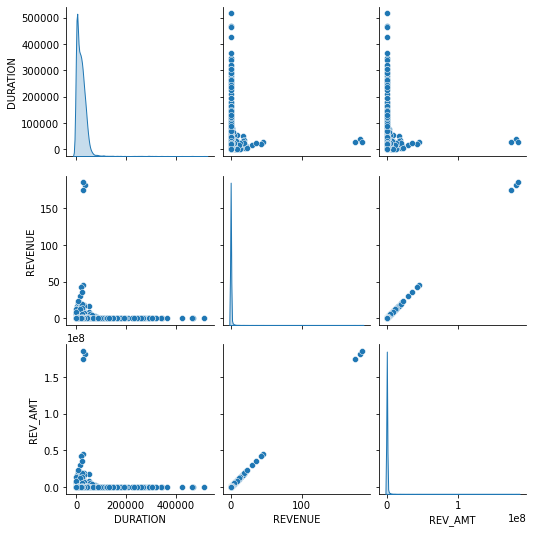

In [131]:
plt.figure(figsize=(10,8))
sns.pairplot(dt_rev,diag_kind= 'kde')

#### Checking  Outlier

<AxesSubplot:>

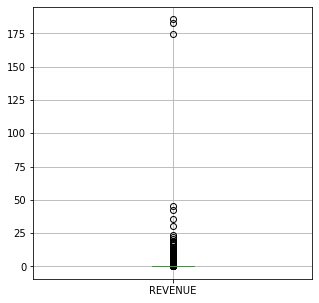

In [132]:
plt.figure(figsize=(5,5))
dt_rev.boxplot(column="REVENUE")

<AxesSubplot:>

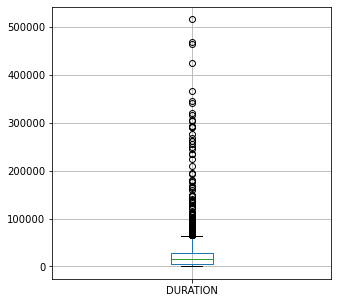

In [133]:
plt.figure(figsize=(5,5))
dt_rev.boxplot(column="DURATION")

In [134]:
dt_count = dt_rev.pivot_table(index=['Win_Lost'], values=['DURATION'], aggfunc='count')
dt_count = dt_count.sort_values('DURATION',ascending=False).reset_index() 
dt_count

,Win_Lost,DURATION
0,Lost,6797
1,Win,1490


Text(0.5, 1.0, 'Win_Lost v/s COUNT')

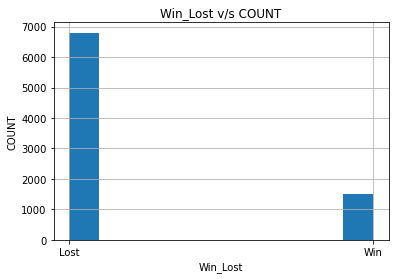

In [135]:
# count plotof win and lost
# plt.style.use('fivethirtyeight')
dt_rev['Win_Lost'].hist()
plt.xlabel('Win_Lost')
plt.ylabel('COUNT')
plt.title('Win_Lost v/s COUNT')

## Bivariate analysis

In [136]:
dt_dur = dt_rev.pivot_table(index=['Win_Lost'], values=['DURATION'], aggfunc='sum')
dt_dur = dt_dur.sort_values('DURATION',ascending=False).reset_index() 
dt_dur

,Win_Lost,DURATION
0,Lost,129011597
1,Win,35705629


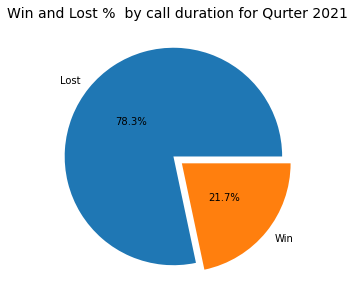

In [137]:
q1_win = dt_rev.groupby("Win_Lost")["DURATION"].sum()
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[8,5])
labels = q1_win.keys()
plt.pie(x=q1_win, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Win and Lost %  by call duration for Qurter 2021", fontsize=14);
pie.savefig("q1GeoPieChart.png")

#### Scatter plot - Duration Vs Revenue

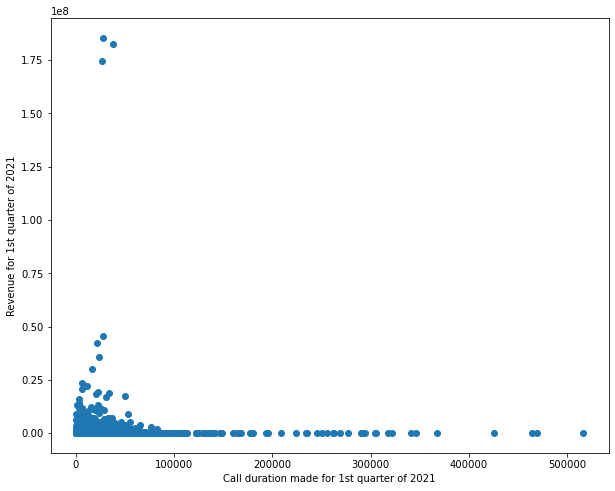

In [138]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dt_rev['DURATION'], dt_rev['REV_AMT'])
ax.set_xlabel('Call duration made for 1st quarter of 2021')
ax.set_ylabel('Revenue for 1st quarter of 2021')
plt.show()

#### Line plot - Duration Vs Revenue

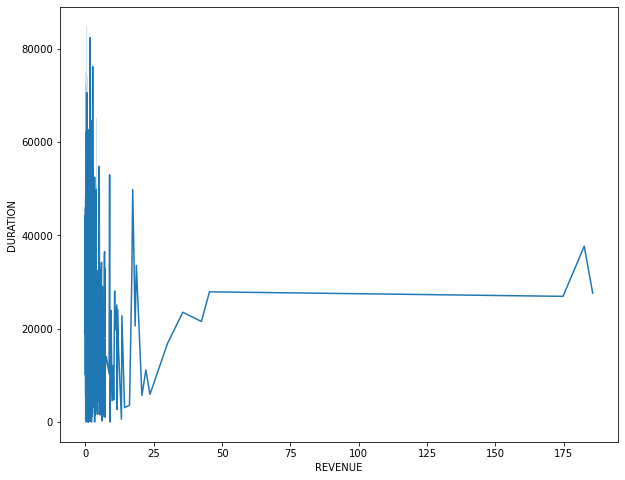

In [139]:
plt.figure(figsize=(10,8))
sns.lineplot(x="REVENUE", y="DURATION", data=dt_rev)
plt.show()

#### Plotting Duraiton Vs Revenue  by Win and Lost 

<AxesSubplot:xlabel='DURATION', ylabel='REV_AMT'>

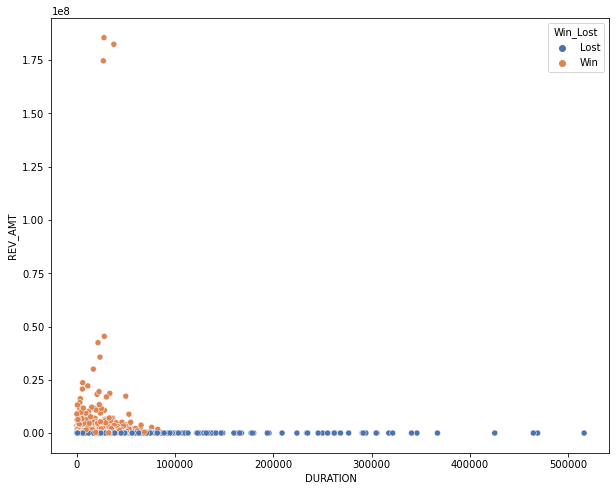

In [140]:
# Plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=dt_rev, x="DURATION", y="REV_AMT", hue="Win_Lost", palette="deep")

#### Checking Win/Lost  by Duratioin 

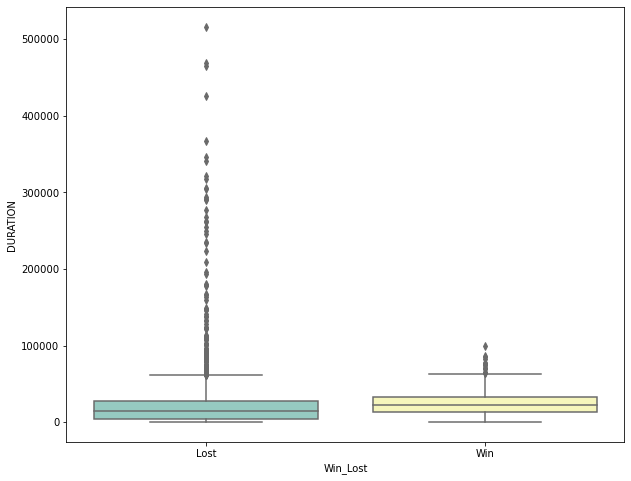

In [141]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Win_Lost",y="DURATION" ,data=dt_rev, palette="Set3")
fig.tight_layout()
plt.show()

In [142]:
# from sklearn.preprocessing import StandardScaler
# std_scale = StandardScaler()
# std_scale
# dt_rev['N_VAL_PIPE'] = std_scale.fit_transform(dt_rev[['N_VAL_PIPE']])

#### Checking correlation 

In [143]:
corrMatrix = dt_rev.corr()
corrMatrix

,DURATION,REVENUE,REV_AMT
DURATION,1.000000,0.010716,0.010716
REVENUE,0.010716,1.000000,1.000000
REV_AMT,0.010716,1.000000,1.000000


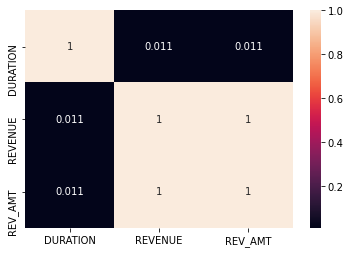

In [144]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [145]:
from scipy.stats import pearsonr

In [146]:
# Apply the pearsonr()
list1 = dt_rev['REV_AMT']
list2 = dt_rev['DURATION']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.011


## Anova 

####   Anova one way

In [147]:
formula = 'DURATION ~ C(Win_Lost) + (REVENUE) + C(Mkt) + C(Geo) + C(Segment) + C(Sub_Brand)'
model = ols (formula,dt_rev).fit()
aov_tab =  anova_lm(model)
print(aov_tab)

                  df        sum_sq       mean_sq          F        PR(>F)
C(Win_Lost)      1.0  1.882853e+09  1.882853e+09  10.818478  1.023400e-03
C(Mkt)          22.0  5.021251e+10  2.282387e+09  13.114115  1.478465e-44
C(Geo)           3.0  1.051874e+09  3.506247e+08   2.014616  1.098818e-01
C(Segment)       3.0  4.494399e+09  1.498133e+09   8.607958  1.125935e-05
C(Sub_Brand)    18.0  3.501210e+10  1.945117e+09  11.176232  4.029720e-31
REVENUE          1.0  1.892140e+07  1.892140e+07   0.108718  7.416446e-01
Residual      1888.0  3.285884e+11  1.740405e+08        NaN           NaN


Assume in our case that we say no changes are impacted to call duration due these variables
P value is here gater then  the 0.05 .Hence we understand there is no significient relationship between these variables and call duraiton .

#### Anova two  way

In [148]:
formula = 'REVENUE ~ C(Mkt) + (DURATION) + C(Geo) + C(Segment) + C(Sub_Brand) + C(Geo): (DURATION) + C(Mkt):(DURATION)'
model = ols (formula,dt_rev).fit()
aov_tab =  anova_lm(model,type=2)
print(aov_tab)

                     df         sum_sq     mean_sq         F    PR(>F)
C(Mkt)             22.0    1044.066745   47.457579  0.822556  0.699722
C(Geo)              3.0       6.857869    2.285956  0.039621  0.989478
C(Segment)          3.0     465.922383  155.307461  2.691859  0.044781
C(Sub_Brand)       18.0    1022.040616   56.780034  0.984137  0.475147
DURATION            1.0      15.120213   15.120213  0.262070  0.608762
C(Geo):DURATION     3.0      31.718195   10.572732  0.183251  0.907817
C(Mkt):DURATION    22.0     393.331432   17.878701  0.309882  0.999150
Residual         1867.0  107717.006794   57.695237       NaN       NaN


In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7770
Date:                Mon, 31 May 2021   Prob (F-statistic):              0.906
Time:                        15:42:26   Log-Likelihood:                -6631.5
No. Observations:                1934   AIC:                         1.340e+04
Df Residuals:                    1867   BIC:                         1.377e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.5309      1.046      0.508      0.612      -1.520       2.582
C(Mkt)[T.ASEAN]                                        0.1822      3.535      0.052      0.959      -6.752       7.116
C(Mkt)[T.BEN]                                         -1.2128      1.849     -0.656      0.512      -4.839       2.414
C(Mkt)[T.CAN]                                         -1.1537      2.363     -0.488      0.625      -5.788       3.481
C(Mkt)[T.CEE]                                          0.6793      1.620      0.419      0.675      -2.498       3.856
C(Mkt)[T.COM]                                          0.4981      1.695      0.294      0.769      -2.826       3.822
C(Mkt)[T.DACH]                                        -0.9261      1.116     -0.830      0.407      -3.116       1.263
C(Mkt)[T.DIS]                                          0.0142      2.170      0.007      0.995      -4.241       4.270
C(Mkt)[T.FRA]                                         -1.6845      1.626     -1.036      0.300      -4.873       1.504
C(Mkt)[T.FSS]                                          1.9409      1.435      1.352      0.176      -0.874       4.756
C(Mkt)[T.GCG]                                         -1.1887      3.719     -0.320      0.749      -8.482       6.104
C(Mkt)[T.IND]                                         -0.3872      2.103     -0.184      0.854      -4.511       3.737
C(Mkt)[T.ISA]                                          0.1451      8.757      0.017      0.987     -17.029      17.319
C(Mkt)[T.ITA]                                         -0.2218      1.340     -0.166      0.869      -2.849       2.406
C(Mkt)[T.JAPAN]                                        0.5148      0.521      0.989      0.323      -0.506       1.536
C(Mkt)[T.KOR]                                         -0.3793      4.528     -0.084      0.933      -9.259       8.501
C(Mkt)[T.LA]                                          -0.0333      1.236     -0.027      0.978      -2.458       2.391
C(Mkt)[T.MEA]                                          0.0143      1.861      0.008      0.994      -3.635       3.664
C(Mkt)[T.NORD]                                         0.3518      1.791      0.196      0.844      -3.161       3.865
C(Mkt)[T.PUB]                                         -0.8879      1.337     -0.664      0.507      -3.511       1.735
C(Mkt)[T.SPGI]                                         0.9569      2.504      0.382      0.702      -3.953       5.867
C(Mkt)[T.UKI]                                          1.5490      1.504      1.030      0.303      -1.400       4.498
C(Mkt)[T.US]                                           0.3232      1.365      0.237      0.813      -2.353  

Hereby we observed Segment is having significant relationship with revenue 

## Estimate the model coefficients for the revenue data

In [182]:
## STATSMODELS ###
# create a fitted model
lm1 = smf.ols(formula='REVENUE ~ DURATION', data=dt_rev).fit()
# print the coefficients
lm1.params

Intercept    0.244856
DURATION     0.000002
dtype: float64

In [180]:
### SCIKIT-LEARN ###
# create X and y
feature_cols = ['DURATION']
X = dt_rev[feature_cols]
y = dt_rev.REVENUE
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)
# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

0.2448559634725768
[1.63286887e-06]


## Liner  coefficients

#### Interpreting Model Coefficients

Interpreting the duration  coefficient (β1)
A "unit" increase in duration spending is associated with a 1.63297415e is "unit" increase in Sales
whihc is very small.

In [152]:
### STATSMODELS ###
# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,0.142072,0.347640
DURATION,-0.000002,0.000005


The "true" coefficient is either within this interval or it isn't, but there's no way to actually know
We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within

In [153]:
### STATSMODELS ###
# print the p-values for the model coefficients
lm1.pvalues

Intercept    0.000003
DURATION     0.329358
dtype: float64

In [154]:
### STATSMODELS ###
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9515
Date:                Mon, 31 May 2021   Prob (F-statistic):              0.329
Time:                        15:42:26   Log-Likelihood:                -22576.
No. Observations:                8287   AIC:                         4.516e+04
Df Residuals:                    8285   BIC:                         4.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2449      0.052      4.670      0.000       0.142       0.348
DURATION    1.633e-06   1.67e-06      0.975      0.329   -1.65e-06    4.91e-06
==============================================================================
Omnibus:                    24786.651   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1515155270.182
Skew:                          43.390   Prob(JB):                         0.00
Kurtosis:                    2095.968   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Adding dummie for win and lost 

In [155]:
dummies=pd.get_dummies(dt_rev[["Win_Lost"]],columns=["Win_Lost"],prefix=["Win_Lost"],drop_first=True).head()
columns=["Win_Lost"]
dt_rev = pd.concat([dt_rev,dummies],axis=1)

In [156]:
dt_rev.head()

,SELLER,DURATION,REVENUE,Sub_Brand,Segment,COUNTRY_EMP,Geo,Mkt,EMPLOYEE_MGR_L1_NAME,REV_AMT,Win_Lost,Win_Lost_Win
0,A RAM UM,46770,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Lost,0.0
1,AADIL LAGHZAOUI,21510,0.634,Systems HW Cross Brand,Segment 2,Morocco,EMEA,MEA,Hicham Sbaa,634000.0,Win,1.0
2,AALISHAN MOOSAVI,1365,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Lost,0.0
3,AARON BROWN,27630,0.972,SW Crossbrand (non z),Segment 2,Portland,AMER,PUB,Paula Buerkle,972000.0,Win,1.0
4,AARON FIELD,3420,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Lost,0.0


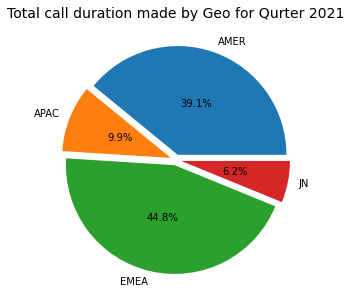

In [157]:
q1_geo = dt_rev.groupby("Geo")["DURATION"].sum()
q1_geo
# data.plot.pie(autopct="%.1f%%");
# Using matplotlib
pie, ax = plt.subplots(figsize=[5,5])
labels = q1_geo.keys()
plt.pie(x=q1_geo, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Total call duration made by Geo for Qurter 2021", fontsize=14);
pie.savefig("q1GeoPieChart.png")

In [158]:
dt_geo = dt_rev.pivot_table(index=['Geo'], values=['DURATION'], aggfunc='sum')
dt_geo = dt_geo.sort_values('DURATION',ascending=False).reset_index() 
dt_geo

,Geo,DURATION
0,EMEA,20309558
1,AMER,17706546
2,APAC,4490085
3,JN,2797557


<Figure size 1080x576 with 0 Axes>

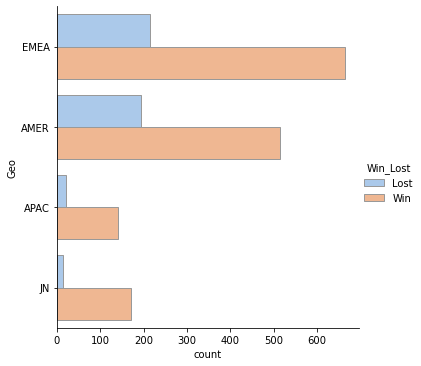

In [159]:
plt.figure(figsize=(15,8))
sns.catplot(y="Geo", hue="Win_Lost", kind="count",palette="pastel", edgecolor=".6",data=dt_rev)

In [160]:
dt_gct = dt_rev.pivot_table(index=['Geo'], values=['Win_Lost'], aggfunc='count')
dt_gct = dt_gct.sort_values('Win_Lost',ascending=False).reset_index() 
dt_gct

,Geo,Win_Lost
0,EMEA,877
1,AMER,708
2,JN,186
3,APAC,163


<AxesSubplot:xlabel='Geo', ylabel='DURATION'>

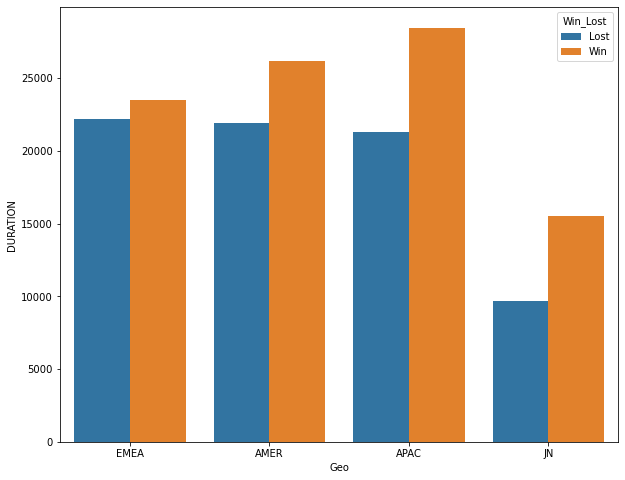

In [161]:
plt.figure(figsize=(10,8))
sns.barplot(x='Geo', y= 'DURATION',data=dt_rev,hue='Win_Lost',ci=None)

In [162]:
dt_gct = dt_rev.pivot_table(index=['Win_Lost','Geo'], values=['DURATION'], aggfunc='sum')
dt_gct = dt_gct.sort_values('DURATION',ascending=False).reset_index() 
dt_gct.head(10)

,Win_Lost,Geo,DURATION
0,Win,EMEA,15561055
1,Win,AMER,13450187
2,Lost,EMEA,4748503
3,Lost,AMER,4256359
4,Win,APAC,4042445
5,Win,JN,2651942
6,Lost,APAC,447640
7,Lost,JN,145615


In [163]:
q1_mkt = dt_rev.groupby('Mkt').sum()['DURATION'].reset_index()
q1_mkt = q1_mkt.sort_values('DURATION',ascending=False).reset_index(drop=True)
q1_mkt.head(10)

,Mkt,DURATION
0,DACH,5448253
1,PUB,4340550
2,FSS,3274850
3,ITA,3091782
4,CEE,2848056
5,JAPAN,2797557
6,LA,2540597
7,FRA,2217045
8,COM,2090405
9,DIS,2067865


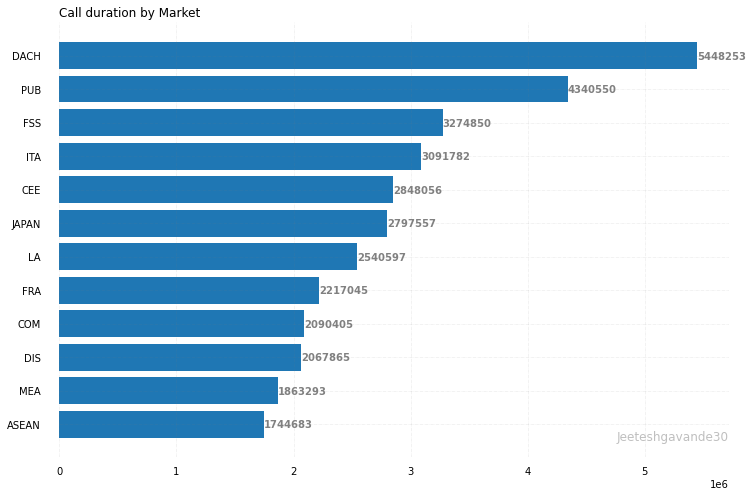

In [164]:
mkt = q1_mkt['Mkt'].head(12)
dur = q1_mkt['DURATION'].head(12)
# Figure Size
fig, ax = plt.subplots(figsize =(12, 8)) 
# Horizontal Bar Plot
ax.barh(mkt, dur)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 15)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Call duration by Market  ',
             loc ='left', )
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.5)
# Show Plot
plt.show()

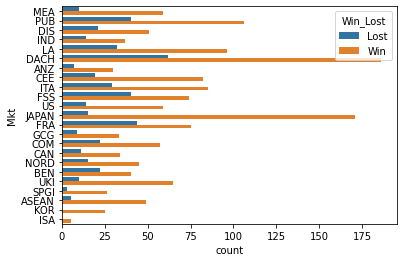

In [165]:
# Mkt  wisn and lost
sns.countplot(y ='Mkt', hue = "Win_Lost", data = dt_rev)
# Show the plot
plt.show()

<AxesSubplot:xlabel='Mkt', ylabel='DURATION'>

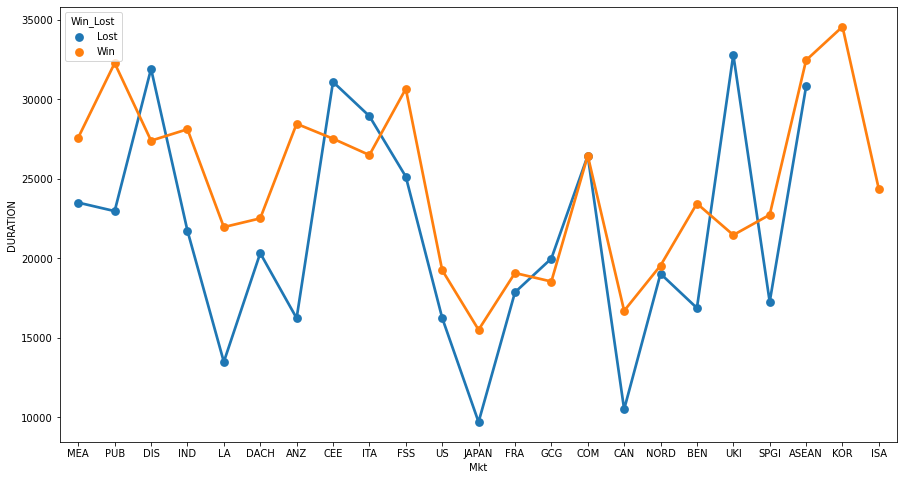

In [166]:
# Mkt duration with win and lost
plt.figure(figsize=(15,8))
sns.pointplot(x='Mkt', y= 'DURATION',data=dt_rev,hue='Win_Lost',ci=None)

<AxesSubplot:xlabel='Segment', ylabel='DURATION'>

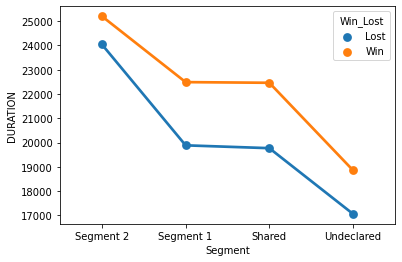

In [167]:
# Segment wise win and lost 
sns.pointplot(x='Segment', y= 'DURATION',data=dt_rev,hue='Win_Lost',ci=None)

In [168]:
dt_win = dt_rev.pivot_table(index=['Win_Lost','SELLER'], values=['DURATION'], aggfunc='sum')
dt_win = dt_win.sort_values('DURATION',ascending=False).reset_index() 

In [169]:
dt_win.head()

,Win_Lost,SELLER,DURATION
0,Lost,CLARA OGWUAZOR MBAMALU,516210
1,Lost,GLENN DARCY,468840
2,Lost,JAGATHESYWARA GOOPAALAN,464550
3,Lost,AQULIA ZIXUAN NG,425250
4,Lost,VALERIE KNIBBELER,366975


#### Call duraitons  by Win and Lost 

In [170]:
dt_win = dt_rev.pivot_table(index=['SELLER','Win_Lost'], values=['DURATION'], aggfunc='sum')
dt_win = dt_win.sort_values('DURATION',ascending=False).reset_index() 
dt_win.head(10)

,SELLER,Win_Lost,DURATION
0,CLARA OGWUAZOR MBAMALU,Lost,516210
1,GLENN DARCY,Lost,468840
2,JAGATHESYWARA GOOPAALAN,Lost,464550
3,AQULIA ZIXUAN NG,Lost,425250
4,VALERIE KNIBBELER,Lost,366975
5,CERISE CELLIER,Lost,346080
6,CHARLES SINGLETON,Lost,340590
7,JUDY WEE NAH LIM,Lost,321405
8,ALONZO WEATHERBY,Lost,317430
9,KAIJUN CHIN,Lost,305430
